# NBA Team Performance Prediction

## 0.Abstract
In this study the relationship between NBA Teams, city's population and the annaul payroll is investigated. Raw data is collected using the following sources:
- NBA salaries @ https://hoopshype.com/salaries/
- City population @ https://www.macrotrends.net/cities/23083/new-york-city/population
- U.S. Gross Domestic Product (GDP) Rate @ https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate

The raw data is stored in the file named "_NBATeamRawData.csv_."

## 1. Setup
### 1.1. Libraries
Libraries for the data manipulation are imported in this section.

In [1]:
# Graphics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

### 1.2. Importing Data from File
A Pandas DataFrame is created importing data from csv file _NBATeamRawData.csv_. The loaded data is shown below. The info is organized as indicated in the following:
- __NBA Team ID__ - Unique ID to identify the team. It contaits the city, the team and the season that the record refers to.
- __Year__ - Year when the seasons started e.g. 1990 refers to 1990-1991 season.
- __NBA Team__ - NBA Team name.
- __Payroll NBA Team__ - Since teams may have changed city and/or name, the _payroll_ refers to the current team name, e.g. '90s Oklahoma payroll data refers to Seattle Supersonics.
- __Host City__ - City where NBA team play/ed at. For NJ and NJ/Brooklyn teams, New York City is considered the hosting city.
- __Population__ - Population of host city referring to a specific year.
- __Payroll__ - Total payroll spent in a given year by an NBA team. Adjusted payroll is here reported in 2021 dollar.
- __W, L, W%__ - Wins, Losses and Winning percentage defined as W/total games = W/(W+L).
- __Reg. Season Placement, Out ot__ - End of season ranking per division.
- __Achievements__ - End of season results. NaN means team did not reach the playoff.
- __Playoff__ - It indicates if a team reached the playoff.
- __Achievement Category__ - Value 1 to 6. See table below. This is used as __"Target"__ in the analyses.
- __Global Ranking__ - Value 1 to 17. See table below. This is just an alternative way to represent the achievement for each team.

|Achievements|Achievement Category| Global Ranking|
|:--|--:|--:|
|Won Finals|1|1|
|Lost Finals|2|2|
|Lost E. Conf. Finals|3|3|
|Lost W. Conf. Finals|3|3|
|Lost E. Conf. Semis|4|5|
|Lost W. Conf. Semis|4|5|
|Lost E. Conf. 1st Rnd.|5|9|
|Lost W. Conf. 1st Rnd.|5|9|
|No Playoffs|6|17|

In [2]:
rd = pd.read_csv('NBATeamRawData.csv') # rd stands for "raw data"
rd.head(3)

,NBA Team ID,Year,Season,NBA Team,Payroll NBA Team,Host City,Population,Payroll,W,L,W%,Reg. Season Placement,Out of,Achievements,Playoff,Achievement Category,Global Ranking
0,Atlanta Hawks_1990-91,1990,1990-91,Atlanta Hawks,Atlanta,Atlanta,2184000,23340645,43,39,0.524,4,7,Lost E. Conf. 1st Rnd.,Yes,5,9
1,Atlanta Hawks_1991-92,1991,1991-92,Atlanta Hawks,Atlanta,Atlanta,2292000,24509666,38,44,0.463,5,7,NaN,No,6,17
2,Atlanta Hawks_1992-93,1992,1992-93,Atlanta Hawks,Atlanta,Atlanta,2406000,33164237,43,39,0.524,4,7,Lost E. Conf. 1st Rnd.,Yes,5,9


## 2. Preliminary Investigation of Raw Data
Preliminary investigation is performed on the raw data to see any meaningful correlation. _Achievement category_ is the target of this study, but also other correlations among the variables are also considered.

### 2.1. Correlations
A preliminary evaluation of the correlations among the variables is performed. With this aim, the following matrix represents the correlation (from -1 to 1) among the different parameters used in the study. When a high correlation factor is detected, a deep look is taken to investigate any relationships among the variables and if any conclusion can be drawn from them. A caviar is that the correlation only detects a liner relationship, but it can be used as a starting point for preliminary evaluations.

In [3]:
rd.corr()

,Year,Population,Payroll,W,L,W%,Reg. Season Placement,Out of,Achievement Category,Global Ranking
Year,1.000000,0.065501,0.811229,-0.024715,-0.024833,-0.001703,-0.238887,-0.785079,0.025080,0.031602
Population,0.065501,1.000000,0.154310,-0.060386,0.055818,-0.060804,-0.014776,-0.061747,-0.029047,-0.011716
Payroll,0.811229,0.154310,1.000000,0.117070,-0.163495,0.145054,-0.292900,-0.555259,-0.101602,-0.103120
W,-0.024715,-0.060386,0.117070,1.000000,-0.866582,0.963729,-0.794196,-0.004345,-0.748286,-0.823047
L,-0.024833,0.055818,-0.163495,-0.866582,1.000000,-0.961622,0.788916,-0.013169,0.746821,0.820286
W%,-0.001703,-0.060804,0.145054,0.963729,-0.961622,1.000000,-0.823438,0.005563,-0.775442,-0.853415
Reg. Season Placement,-0.238887,-0.014776,-0.292900,-0.794196,0.788916,-0.823438,1.000000,0.304284,0.721088,0.787988
Out of,-0.785079,-0.061747,-0.555259,-0.004345,-0.013169,0.005563,0.304284,1.000000,-0.018760,-0.024489
Achievement Category,0.025080,-0.029047,-0.101602,-0.748286,0.746821,-0.775442,0.721088,-0.018760,1.000000,0.923505
Global Ranking,0.031602,-0.011716,-0.103120,-0.823047,0.820286,-0.853415,0.787988,-0.024489,0.923505,1.000000


### 2.1.1. Payroll vs. Year
There is a correlation (0.811) between _Payroll_ and _Year_. Considering that payroll is adjusted to taken into account the inflation, an increment in average payroll is detected. In the graph below the 'mean' for each year is reported. In addition, mean +/- standard deviation is also reported providing a visual representation of its variability. Clearly, the correlation is not linear, but the following periods can be identified:
- Payroll steadily increased between 1990 (21.6 millions) and 2000 (77.5 millions);
- After year 2000, an approximately 80 million plateau was reached and maintained till approximately 2010;
- Starting year 2000, a small declined can be detected, before a noticeable raise starting around 2014.

A possible explanation of what caused these trends might be found if we look at the financial crises that the U.S. faced during the early 2000s (dot-com bubble) and after the 2008 (subprime mortgage crisis). It is possible that, after the shocks that impacted the U.S. economy, the spending in NBA Team payrolls reflected this economic distress. In the graph below the cumulative GDP product (starting from the 1990) is considered. Both graphs seems to reflect these events.


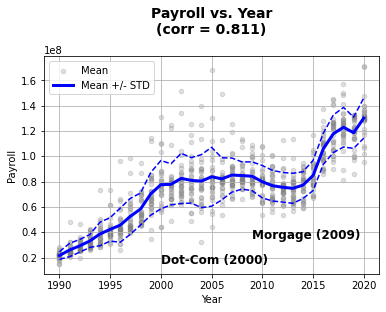

In [4]:
x='Year'
y='Payroll'
ax = rd.plot.scatter(x=x,y=y,color='grey',alpha=0.25)

# It plots the mean
rd.pivot_table('Payroll',index='Year',aggfunc='mean').plot(ax=ax,color='blue',linewidth=3)

# It plots the mean +/- standard deviation (per year)
(rd.pivot_table('Payroll',index='Year',aggfunc='mean')+rd.pivot_table('Payroll',index='Year',aggfunc='std')).plot(ax=ax,ls='--',color='b')
(rd.pivot_table('Payroll',index='Year',aggfunc='mean')-rd.pivot_table('Payroll',index='Year',aggfunc='std')).plot(ax=ax,ls='--',color='b')

plt.text(x=2000,y=0.15e8,s='Dot-Com (2000)',fontsize=12,fontweight='bold')
plt.text(x=2009,y=0.35e8,s='Morgage (2009)',fontsize=12,fontweight='bold')

plt.grid()
plt.title(y+' vs. '+x+'\n(corr = '+str(round(rd.corr().loc[x,y],3))+')\n',fontsize=14,fontweight='bold')
plt.legend(['Mean','Mean +/- STD'])
plt.show()
# Show the values related to the selected years
# rd.pivot_table('Payroll',index='Year',aggfunc='mean').loc[[1990,2000,2009,2013,2020]]

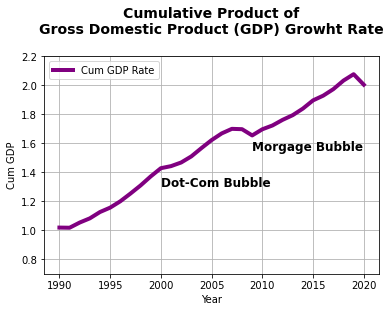

In [5]:
gdpr = pd.read_csv('US_GDPR_GrowthRate.csv',skiprows=16)
gdpr['Year'] = gdpr['date'].str.split('-',expand=True).iloc[:,0].astype(int)
gdpr['Cum GDP Rate'] = ((gdpr[(gdpr['Year'] >= 1990) & (gdpr['Year'] <= 2020)][' GDP Growth (%)']/100)+1).cumprod()
cum_gdpr = gdpr[(gdpr['Year'] >= 1990) & (gdpr['Year'] <= 2020)][['Year','Cum GDP Rate']]
cum_gdpr.plot(x='Year',y='Cum GDP Rate',c='purple',lw=4)
plt.title('Cumulative Product of\nGross Domestic Product (GDP) Growht Rate\n',fontsize=14,fontweight='bold')
plt.grid()
plt.ylim(0.7,2.2)
plt.ylabel('Cum GDP')
plt.text(x=2000,y=1.3,s='Dot-Com Bubble',fontsize=12,fontweight='bold')
plt.text(x=2009,y=1.55,s='Morgage Bubble',fontsize=12,fontweight='bold')
plt.show()

From the first graph above we can infer that there is an significant dispersion in the payroll data when grouped per year. In the following graph the ratio between standard deviation and mean (_Coefficient of Variation_ or _COV_, per year) is reported. From the mid 90's till 2005, the COV coefficient ranges between 22% and 30%, dropping around 10%-15% after that. It indicates that, on average, team spending increased (graph above) but the spending variation between teams seems it has been narrowed.

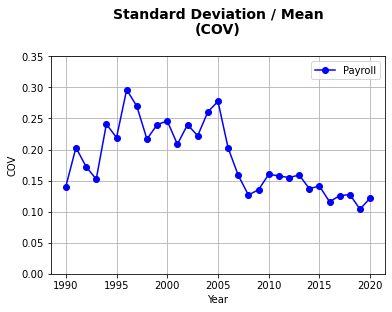

In [6]:
# It plots the COV i.e. the ration between starndard deviation and mean
(rd.pivot_table('Payroll',index='Year',aggfunc='std')/rd.pivot_table('Payroll',index='Year',aggfunc='mean')).plot(marker='o',c='b')
plt.grid()
plt.title('Standard Deviation / Mean\n(COV)\n',fontsize=14,fontweight='bold')
plt.ylim(0,.35)
plt.ylabel('COV')
plt.show()

Another useful way to show the data is using "boxplot”, grouped by year as shown in the following. It is clear that the spending is not uniformly distributed and the variations (see also the outliers) is significant.

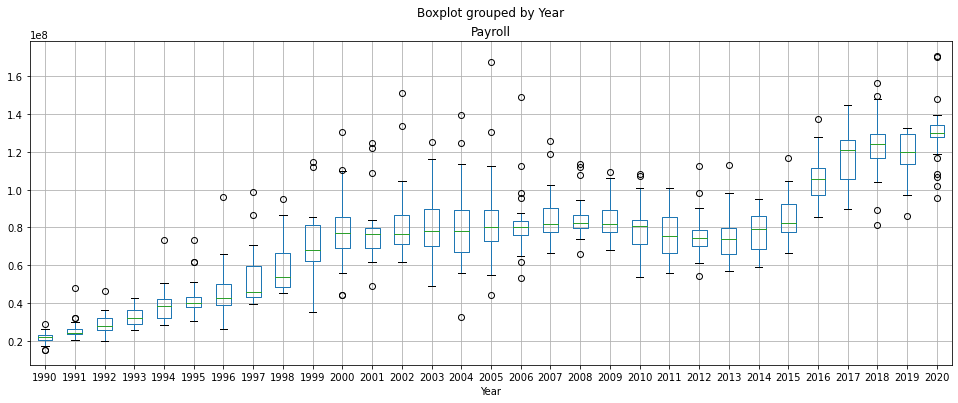

In [7]:
rd.boxplot(column='Payroll',by='Year',figsize=(16,6))
plt.show()

In the following figure, the payroll historical data was split between teams that made it to the playoffs and the ones that did not. On average, the team that qualified for the playoff spent more than the ones that did not qualified. It is important to remind that this is "on average", in fact there are data points (teams) that spent significant amount in terms of payroll despite they did not reach the playoff. This phenomenon seems to be more common in the first decade on 2000s.

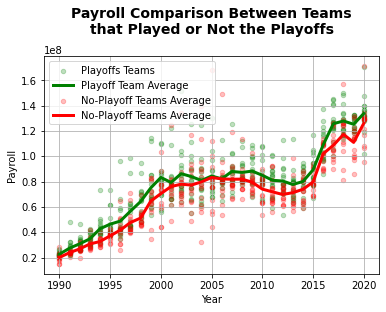

In [8]:
x='Year'
y='Payroll'
ax = rd[rd['Playoff']=='Yes'].plot.scatter(x=x,y=y,color='green',alpha=0.25)
rd[rd['Playoff']=='Yes'].pivot_table('Payroll',index='Year',aggfunc='mean').plot(ax=ax,color='g',linewidth=3)
rd[rd['Playoff']=='No'].plot.scatter(ax=ax,x=x,y=y,color='red',alpha=0.25)
rd[rd['Playoff']=='No'].pivot_table('Payroll',index='Year',aggfunc='mean').plot(ax=ax,color='r',linewidth=3)
plt.legend(['Playoffs Teams','Playoff Team Average','No-Playoff Teams Average','No-Playoff Teams Average'])
plt.title('Payroll Comparison Between Teams\nthat Played or Not the Playoffs\n',fontsize=14,fontweight='bold')
plt.grid()

### 2.2. Achievement Category
In the following, both _Winning Percentage (W%)_ and _Regular Season Placement_ are considered as predictors of the _Achievement_ category. The obvious trend is that the more wins lead to higer place in the division/conference. It is important to stress that, due to the NBA grouping system that uses Conferences and Divisions, not necessarily higher winning percentage corresponds to higher placement. An example is represented by the Western Conference teams that, overall, were more dominants durign the 90s. The consequent paradox was that even teams with good record could not reach higher placements, and team in the Eastern Conference were able to reach the playoff even with a losing record (i.e. < 0.500).

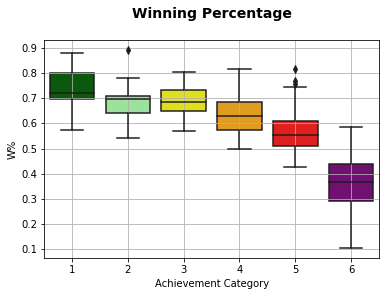

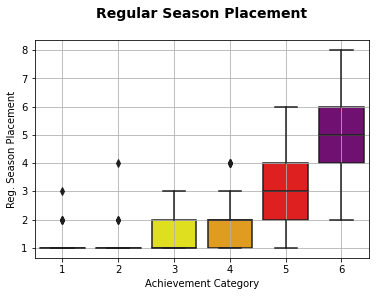

In [9]:
col = ['darkgreen','lightgreen','yellow','orange','red','purple']
sns.boxplot(y='W%',x='Achievement Category',data=rd,palette=col)
plt.grid()
plt.title('Winning Percentage\n',fontsize=14,fontweight='bold')
plt.show()

sns.boxplot(y='Reg. Season Placement',x='Achievement Category',data=rd,palette=col)
plt.title('Regular Season Placement\n',fontsize=14,fontweight='bold')
plt.grid()
plt.show()

On the other side, another obvious conclusion is that teams that reached higher spots in their divisions/conference were more likely to reach later stages in playoffs. Looking at the graphs above, this trend is clearly noticeable. From the same graphs, we can also detect the performances of so-called _underdogs_ that reached (and sometimes won) the finals despite a low placement in the regular season, and the _elite teams_ that won the league but they were knocked out on the first round.

- An example of the first group ( _underdogs_ ) are the _Houston Rockets_ during the 1994-95 season. In the analyzed period, it is the only team that won the title despite a 3rd place in their division. This was the back-to-back title for the team. Same thing can be said for the 1998-1999 _New York Knicks_ that, from a 4th place in their division, were able to reach (and but lose) the finals.


- On the other group ( _elite teams_ ), even team that started the playoffs from a 1st place in their divisions lost the first round. A clear example is represented by the 1993-94 _Seattle Supersonics_ that, despite a 0.768 winning record (1st in the entire league), failed to advance in the playoffs loosing against _Denver Nuggets_.

From the graphs above and the results below, it is clear that more often good teams fails to advance despite a good record in the regular season, but it is more unlikely that underdogs will win the title.

In [10]:
rd[(rd['Achievement Category'] == 1) & (rd['Reg. Season Placement'] == 3)].sort_values(by='Year')

,NBA Team ID,Year,Season,NBA Team,Payroll NBA Team,Host City,Population,Payroll,W,L,W%,Reg. Season Placement,Out of,Achievements,Playoff,Achievement Category,Global Ranking
312,Houston Rockets_1994-95,1994,1994-95,Houston Rockets,Houston,Houston,3262000,30619652,47,35,0.573,3,6,Won Finals,Yes,1,1


In [11]:
rd[(rd['Achievement Category'] == 2) & (rd['Reg. Season Placement'] == 4)].sort_values(by='Year')

,NBA Team ID,Year,Season,NBA Team,Payroll NBA Team,Host City,Population,Payroll,W,L,W%,Reg. Season Placement,Out of,Achievements,Playoff,Achievement Category,Global Ranking
578,New York Knicks_1998-99,1998,1998-99,New York Knicks,New York,New York,17479000,94808240,27,23,0.54,4,7,Lost Finals,Yes,2,2


In [12]:
rd[(rd['Achievement Category'] == 5) & (rd['Reg. Season Placement'] == 1)].sort_values(by='Year')

,NBA Team ID,Year,Season,NBA Team,Payroll NBA Team,Host City,Population,Payroll,W,L,W%,Reg. Season Placement,Out of,Achievements,Playoff,Achievement Category,Global Ranking
787,San Antonio Spurs_1990-91,1990,1990-91,San Antonio Spurs,San Antonio,San Antonio,1134000,21943500,55,27,0.671,1,7,Lost W. Conf. 1st Rnd.,Yes,5,9
604,Seattle SuperSonics_1993-94,1993,1993-94,Seattle SuperSonics,Oklahoma City,Seattle,2351000,28505845,63,19,0.768,1,7,Lost W. Conf. 1st Rnd.,Yes,5,9
465,Miami Heat_1997-98,1997,1997-98,Miami Heat,Miami,Miami,4630000,55710494,55,27,0.671,1,7,Lost E. Conf. 1st Rnd.,Yes,5,9
466,Miami Heat_1998-99,1998,1998-99,Miami Heat,Miami,Miami,4733000,70528825,33,17,0.660,1,7,Lost E. Conf. 1st Rnd.,Yes,5,9
45,Boston Celtics_2004-05,2004,2004-05,Boston Celtics,Boston,Boston,4095000,87758815,45,37,0.549,1,5,Lost E. Conf. 1st Rnd.,Yes,5,9
230,Denver Nuggets_2005-06,2005,2005-06,Denver Nuggets,Denver,Denver,2181000,74876666,44,38,0.537,1,5,Lost W. Conf. 1st Rnd.,Yes,5,9
829,Toronto Raptors_2006-07,2006,2006-07,Toronto Raptors,Toronto,Toronto,5125000,64818328,47,35,0.573,1,5,Lost E. Conf. 1st Rnd.,Yes,5,9
474,Miami Heat_2006-07,2006,2006-07,Miami Heat,Miami,Miami,5276000,81844901,44,38,0.537,1,5,Lost E. Conf. 1st Rnd.,Yes,5,9
200,Dallas Mavericks_2006-07,2006,2006-07,Dallas Mavericks,Dallas,Dallas,4731000,112485175,67,15,0.817,1,5,Lost W. Conf. 1st Rnd.,Yes,5,9
805,San Antonio Spurs_2008-09,2008,2008-09,San Antonio Spurs,San Antonio,San Antonio,1674000,80138361,54,28,0.659,1,5,Lost W. Conf. 1st Rnd.,Yes,5,9


### 2.3. Payroll and Relative Payroll
It is a common and reasonable idea that better players have higher salaries, and a winning team will be composed by above-average players (in terms of skills and salary). As a consequence a winning NBA team might have higher payroll. Here this assumption (the higher the salary the better the achievement) is tested, assessing if the payroll can be a predictor of a team achievement. In the graph above, it was already noticed that even teams with high payroll may not even end to play the playoffs at all. Looking at the raw data shown in the scatter plots below, it is clear that no correlation exist. A caveat is that the payroll, even if adjusted, is not a good parameter to use, since the adjusted playoff is not constant, and generally increases with time.

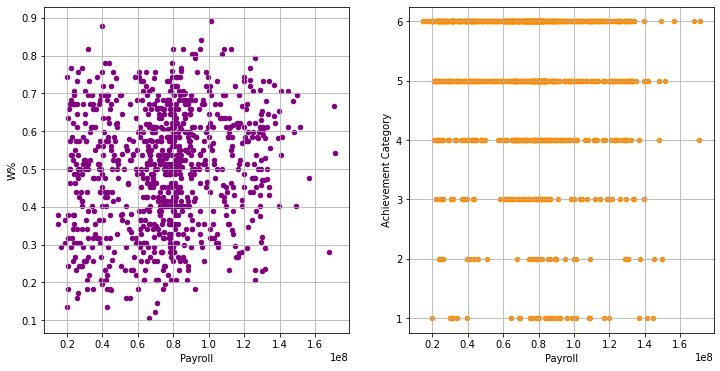

In [13]:
fig, axes = plt.subplots(1,2)
rd.plot(ax=axes[0],kind='scatter',x='Payroll',y='W%',figsize=(16,10),grid=True,color='purple')
rd.plot(ax=axes[1],kind='scatter',x='Payroll',y='Achievement Category',figsize=(12,6),grid=True,color='darkorange')
plt.show()

We believe that a good predictor would be the relative payroll among NBA teams, grouped by year. Using this approach, only the relative difference between teams is considered (each year). The main point is to investigate if  an above -average spending team  reaches better placement in a given season. The ___Yearly Relative Payroll (YRP)___ is calculated as:

$YRP = \frac{Team Payroll_{(year)}} {Average Payroll_{(year)}} - 1$

For example, in a given year with an average payroll of 10 million, a team payroll of 12 million will have (12/10-1) = 0.20 i.e. it spends 20% more than the average.

In the graphs below, _Yearly Relative Payroll (YRP)_ is considered to asses if this can be a predictor, in order, for _Winning Percentage (W%)_ and for _Achievement Category_ as shown. It appears that not only we have low correlations values (0.35 and -0.29 respectively), but also that this parameter is not a real indicator for a team success and achievement. We believe that it can be partially explained by the following reasons:
- In a given year, a team can spend a lot of money in players payroll, but injuries might play an important role. Assuming that a team is composed by approximately 4 to 6 main players (i.e. players that play significant part of the games and contribute to the team success), if one or two of the top players face an injury that keep them off the court for several games per seasons, then the is a double effect:
 
    __(a)__ injured player/s is/are still paid despite they are not able to play, missing an important contribution to team success;
    
    __(b)__ additional player/s, that ends with an additional cost in terms of payroll, need to be added to the roster, but it is expected that these "replacements" will not be as effective as the top players;
    
    __(c)__ even if new players are not added to the roster, the same payroll “delivers”, on average, less "skilled" team.  

    __NOTE:__ This is not part of the scope of this study, but a way to test this reasoning would be investigating the relationship between _Payroll_ (and/or _YRP_ ), and _Players' Injuries_ to see the impact on team outcomes. High payroll and high number of injuries (that keep high-end players off court) should lead to a poor team performance. At the same time, also high payroll but low level of injuries should lead to a better team performance.
   
   
- This phenomenon can also be explained looking at the problem from a different angle. The players' access to the NBA is granted via annual drafting, where the "losing" team from past season have higher picks (unless future picks are traders in past deals). Often a team’s goal might be starting the so-called "rebuild phase”, accepting bad records for a few years in order to have higher spots in the future drafts. In this process, usually "veterans" that have high salary are let go in favor of young (and usually less expensive) players but that will contribute to the team success in the near future.

In [14]:
# Mean of payroll per year is calculated
pa = rd.pivot_table(values='Payroll',index='Year',aggfunc='mean') # pa = payroll average
temp = rd[['NBA Team ID','Year','Payroll']].merge(pa, left_on='Year', right_on='Year') # temp DataFrame
temp['Yearly Relative Payroll'] = temp['Payroll_x'] / temp['Payroll_y'] - 1 # relative payroll in comparisoon to average
rd = rd.merge(temp,on='NBA Team ID')
rd.drop(columns=['Payroll_x','Payroll_y','Year_y'],inplace=True)
rd.rename(columns={'Year_x':'Year'},inplace=True)

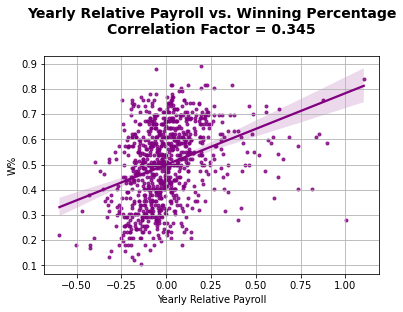

In [15]:
sns.regplot(x=rd['Yearly Relative Payroll'],y=rd['W%'],marker='.',color='purple')
plt.title('Yearly Relative Payroll vs. Winning Percentage\nCorrelation Factor = '+
          str(round(rd[['Yearly Relative Payroll','W%']].corr().iloc[0,1],3))+'\n',
          fontweight='bold',fontsize=14)
plt.grid()
plt.show()

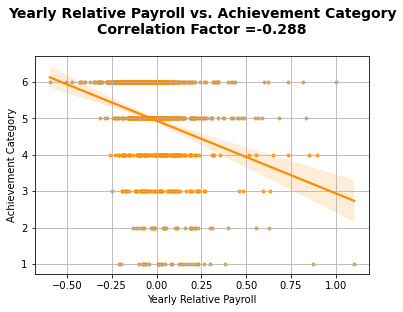

In [16]:
sns.regplot(x=rd['Yearly Relative Payroll'],y=rd['Achievement Category'],marker='.',color='darkorange')
plt.grid()
plt.title('Yearly Relative Payroll vs. Achievement Category\nCorrelation Factor ='+
          str(round(rd[['Yearly Relative Payroll','Achievement Category']].corr().iloc[0,1],3))+'\n',
          fontweight='bold',fontsize=14)
plt.show()

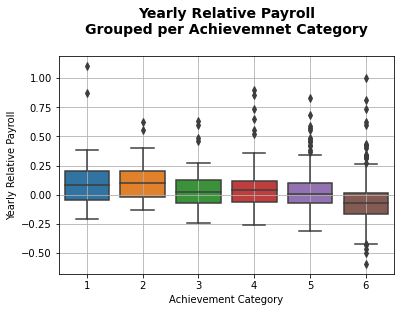

In [17]:
sns.boxplot(x='Achievement Category',y='Yearly Relative Payroll',data=rd)
plt.title('Yearly Relative Payroll\nGrouped per Achievemnet Category\n',fontsize=14,fontweight='bold')
plt.grid()
plt.show()

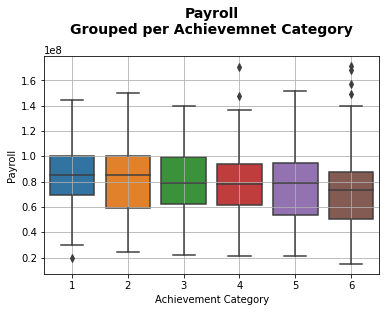

In [18]:
sns.boxplot(x='Achievement Category',y='Payroll',data=rd)
plt.title('Payroll\nGrouped per Achievemnet Category\n',fontsize=14,fontweight='bold')
plt.grid()
plt.show()

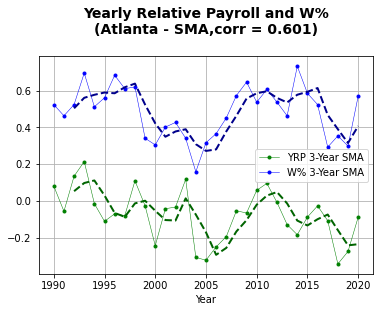

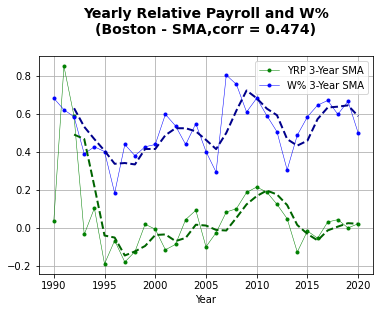

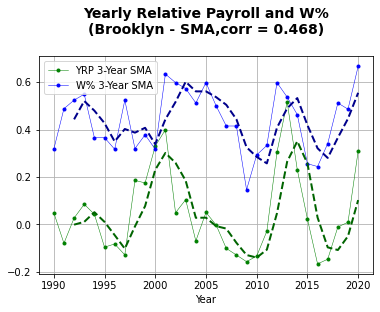

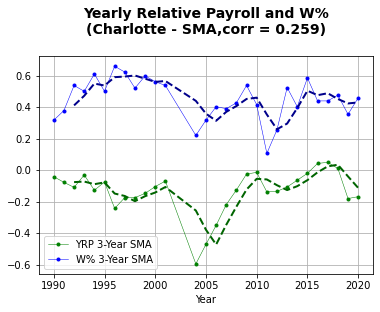

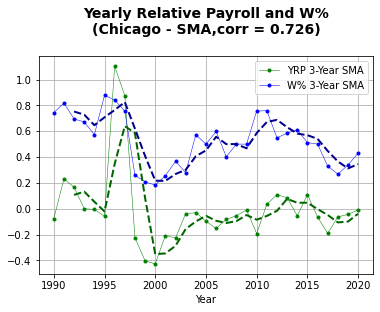

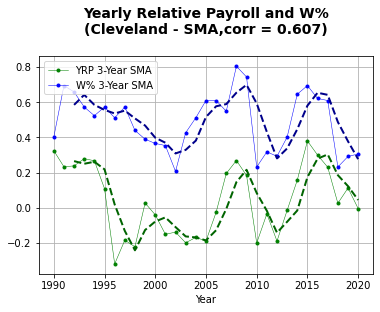

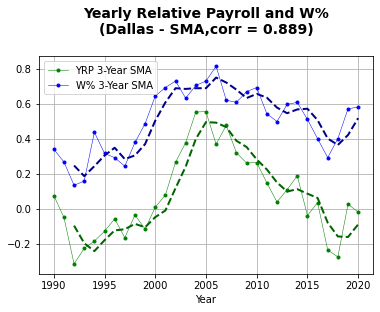

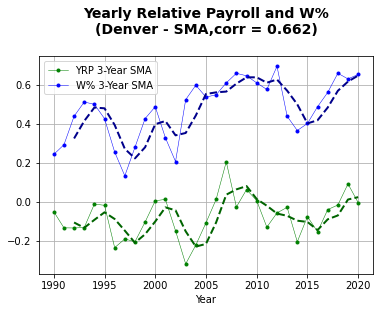

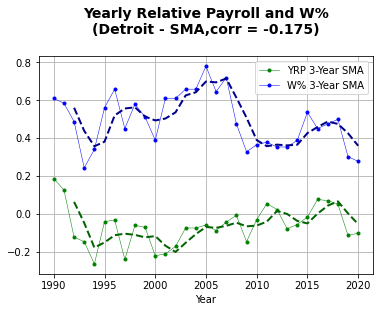

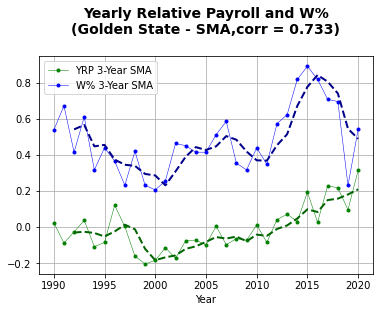

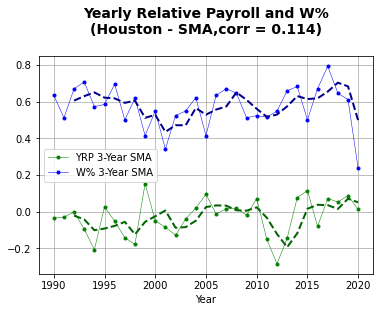

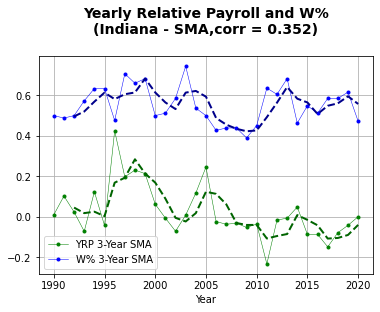

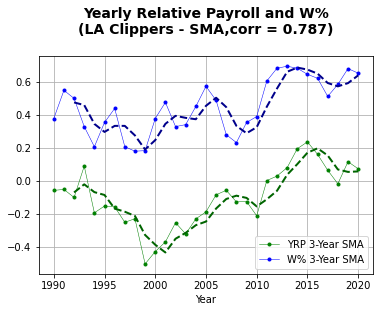

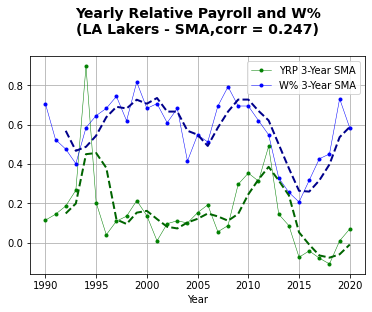

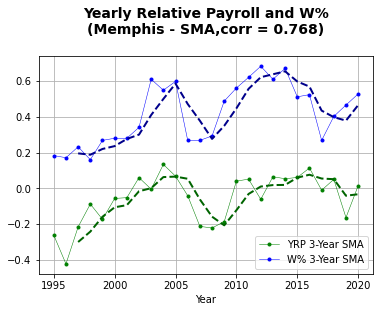

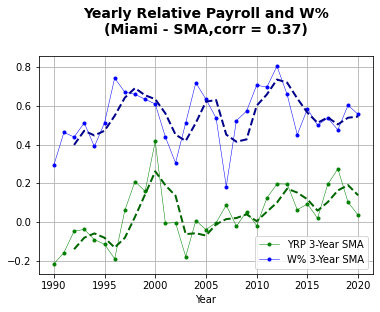

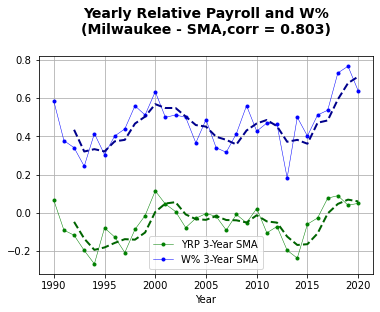

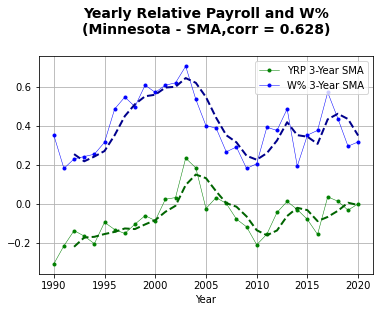

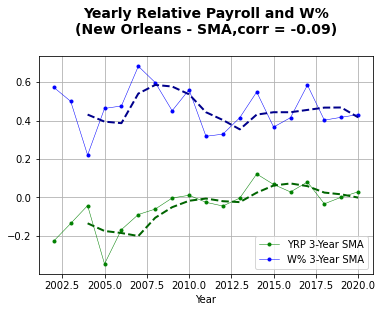

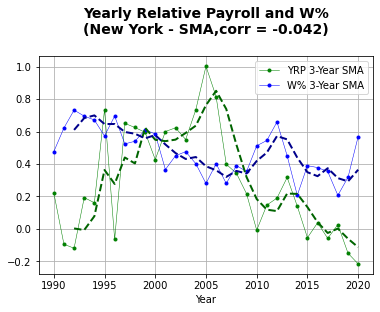

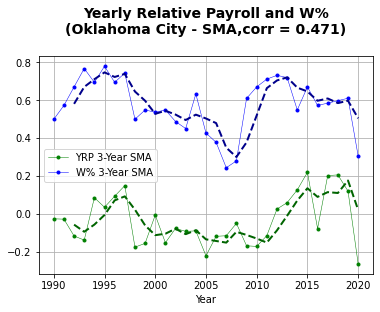

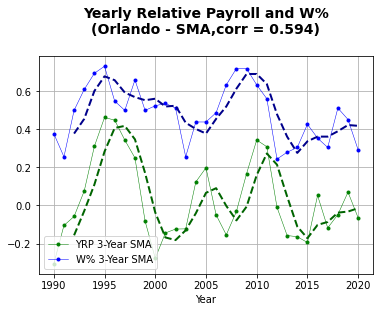

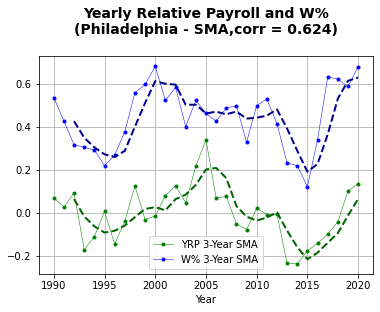

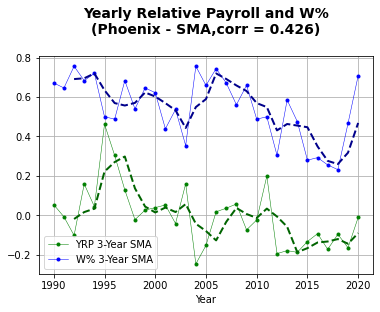

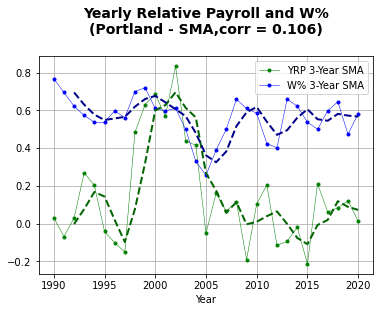

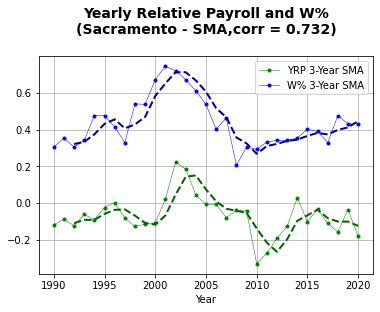

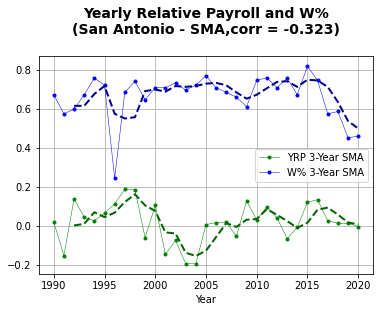

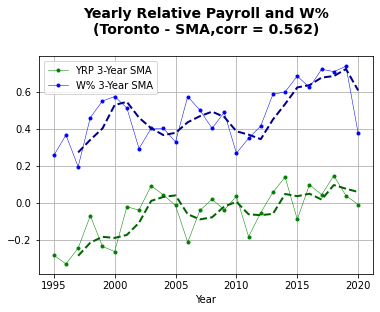

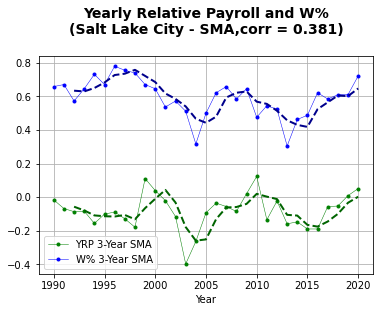

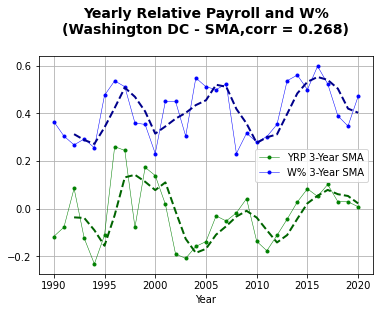

In [19]:
n_sma = 3 # Years for Simple Moving Average Calculations (SMA)
selection = 'Payroll NBA Team' # or 'NBA Team' if history for each team needs to be shown
sma_data = pd.DataFrame() # Empty DataFrame is created to append data for the following calculations
corr_per_team = []
for team in rd[selection].unique():
    # Sub-DataFrame is created to print the results for each team
    graph = rd[rd[selection] == team][['Year','Yearly Relative Payroll','W%','Achievement Category']]
    graph['YRP '+str(n_sma)+'-Year SMA'] = graph['Yearly Relative Payroll'].rolling(n_sma).mean()
    graph['W% '+str(n_sma)+'-Year SMA'] = graph['W%'].rolling(n_sma).mean()
    graph['Ach. Category '+str(n_sma)+'-Year SMA'] = graph['Achievement Category'].rolling(n_sma).mean()
    
    # ".conatenate" was ued in lieu of ".append" to meet requiremtns of newer Pandas version
    # !!! sma_data = sma_data.append(graph) !!!
    sma_data = pd.concat([sma_data,graph],axis=0,ignore_index=True)
    
    # This sets axes for graph
    x='Year'
    y=['Yearly Relative Payroll','W%']
    y_ma=['YRP '+str(n_sma)+'-Year SMA','W% '+str(n_sma)+'-Year SMA']
    #y_ma=['YRP '+str(n_sma)+'-Year SMA','Ach. Category '+str(n_sma)+'-Year SMA'] # This if Ach. Cat. is used
    
    # Correlation for each team
    corr_per_team.append(round(graph[y_ma].corr().iloc[0,1],3))
    
    # Graphs 
    ax = graph.plot(kind='line',x=x,y=y,marker='.',linestyle='-',linewidth=0.5,color=['green','blue'])
    graph.plot(kind='line',x=x,y=y_ma,marker=None,linestyle='--',linewidth=2,color=['darkgreen','darkblue'],ax=ax)
    plt.grid()
    plt.title(y[0]+' and '+y[1]+'\n('+team+' - SMA,corr = '+str(corr_per_team[-1])+')\n',fontweight='bold',fontsize=14)
    plt.legend(y_ma)
    plt.show()
    
sma_data.dropna(inplace=True) # Since SMA is used, rows with NaN values are created. These rows are removed.

Looking at the proposed graphs above, it seems that there is a correlation between the SMAs of _Yearly Relative Paytoll_ and _W%_. Each graph (each team) reports this value. For some of the teams, the correlations is pretty evident, for others or it does not existi, or it is even negative. Below the correlation factor distribution is proposed. A clear conclusion cannot be drawn, but it can be noticed that roughly 40% of the teams (12 out of 30) have a correlation factor equal to 0.6 or higher.

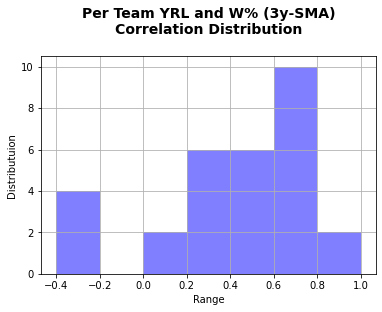

In [20]:
plt.hist(corr_per_team,bins=[-0.4,0,0.2,0.4,0.6,0.8,1],density=False,alpha=0.5,color='blue',width=.2)
plt.grid()
plt.xlabel('Range')
plt.ylabel('Distributuion')
plt.title('Per Team YRL and W% ('+str(n_sma)+'y-SMA)\nCorrelation Distribution\n',fontsize=14,fontweight='bold')
plt.show()

When all the results are considered as a whole, it can be seen that the correlation based on Simple Moving Average (SMA) is pretty weak. The graphs below show the results when all teams are considered.

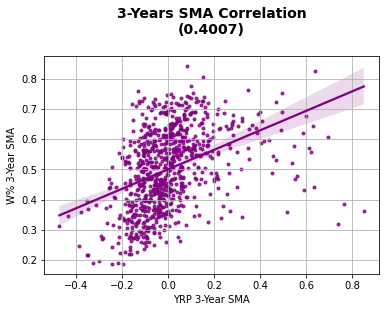

In [21]:
sns.regplot(x=sma_data['YRP '+str(n_sma)+'-Year SMA'],y=sma_data['W% '+str(n_sma)+'-Year SMA'],marker='.',color='purple')
plt.grid()
plt.title(str(n_sma)+'-Years SMA Correlation\n('+
          str(round(sma_data[['YRP '+str(n_sma)+'-Year SMA','W% '+str(n_sma)+'-Year SMA']].corr().iloc[0,1],4))+')\n',
          fontsize=14,fontweight='bold')
plt.show()

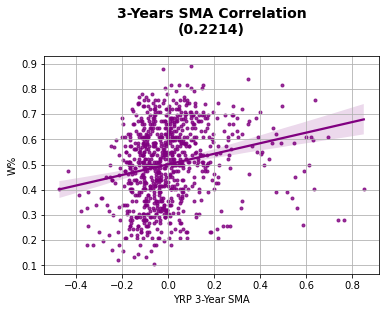

In [22]:
sns.regplot(x=sma_data['YRP '+str(n_sma)+'-Year SMA'],y=sma_data['W%'],marker='.',color='purple')
plt.grid()
plt.title(str(n_sma)+'-Years SMA Correlation\n('+
          str(round(sma_data[['YRP '+str(n_sma)+'-Year SMA','W%']].corr().iloc[0,1],4))+')\n',
          fontsize=14,fontweight='bold')
plt.show()

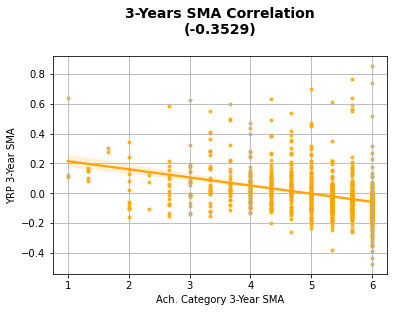

In [23]:
sns.regplot(x=sma_data['Ach. Category '+str(n_sma)+'-Year SMA'],y=sma_data['YRP '+str(n_sma)+'-Year SMA'],marker='.',color='orange')
plt.grid()
plt.title(str(n_sma)+'-Years SMA Correlation\n('+
          str(round(sma_data[['YRP '+str(n_sma)+'-Year SMA','Ach. Category '+str(n_sma)+'-Year SMA']].corr().iloc[0,1],4))+')\n',
          fontsize=14,fontweight='bold')
plt.show()

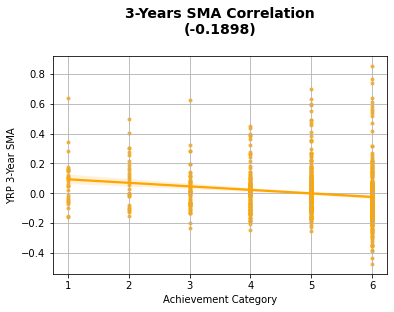

In [24]:
sns.regplot(x=sma_data['Achievement Category'],y=sma_data['YRP '+str(n_sma)+'-Year SMA'],marker='.',color='orange')
plt.grid()
plt.title(str(n_sma)+'-Years SMA Correlation\n('+
          str(round(sma_data[['YRP '+str(n_sma)+'-Year SMA','Achievement Category']].corr().iloc[0,1],4))+')\n',
          fontsize=14,fontweight='bold')
plt.show()

### 2.4. Population
In this section the impact of population is investigated. The main point is to verify that, generally speaking, only team from big cities wins NBA titles. Population changes throught years (generally increasing) and, similar to what was done for payroll, we can mitigate this effect introducing a new parameter called ___Yearly Relative Population___ simply, for a given year, calculate the ratio between population and mean.

$YRPop = \frac{Team-Related Popupation_{(year)}} {Average Team-Related Popupation_{(year)}} - 1$

In [25]:
# Mean of population per year is calculated
temp=[] # Reset previous dafafram
poa = rd.pivot_table(values='Population',index='Year',aggfunc='mean') # poa = population average
temp = rd[['NBA Team ID','Year','Population']].merge(poa, left_on='Year', right_on='Year') # temp DataFrame
temp['Yearly Relative Population'] = temp['Population_x'] / temp['Population_y'] - 1 # relative population in comparison to average
rd = rd.merge(temp,on='NBA Team ID')
rd.drop(columns=['Population_x','Population_y','Year_y'],inplace=True)
rd.rename(columns={'Year_x':'Year'},inplace=True)

From the box plot below, if we focus on the _Achievement Category_ equal to 1, statistically speaking, it seems that most populated cities that host a NBA team tend to win the finals. As clearly shown, there are outliers and the trend is not strong. This leads to the conclusion that the _Population_ is not a strong predictor for the _Achievement Category_.

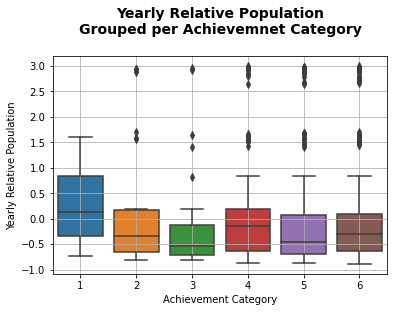

In [26]:
sns.boxplot(data=rd,x='Achievement Category',y='Yearly Relative Population')
plt.grid()
plt.title('Yearly Relative Population\nGrouped per Achievemnet Category\n',fontsize=14,fontweight='bold')
plt.show()

## 3. Classifiers 
In this section a classifier will be used to predict performance (_Achievement Category_ as target) of NBA teams using different predictor. In particular, the following parameters are considered in this study:

- Yearly Relative Payroll (in lieu of _Payroll_ to mitigate effect of inflation and yearly payroll increment)
- Yearly Relative Population (in lieu of _Population_ to mitigate effect of population increase)
- Regular Season Placement
- Winning Percentage (W%)

Before moving forward with the classifier, it is worth noticing that, intuitively, _Regular Season Placement_ and _Winning Percentage (%W)_ should be strongly correlated and only one of them should be used. In reality, as it appears from the box-plot below, the _Regular Season Placement_ is strongly influenced by league organization, which is divided in _Conferences_ and _Divisions_. For example, it is possible that a team can still win the division despite a low _Winning Percentage_. This condition has also an impact in the playoff brackets.

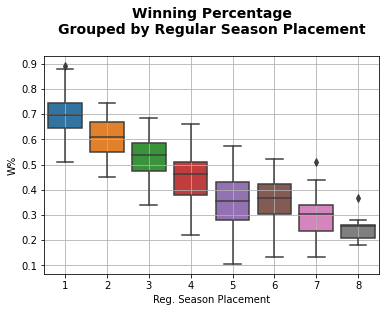

In [27]:
sns.boxplot(data=rd,x='Reg. Season Placement',y='W%')
plt.title('Winning Percentage\nGrouped by Regular Season Placement\n',fontsize=14,fontweight='bold')
plt.grid()

### 3.1. Data Preparation and Preprocessing
In this section only the data for the parameters indicated above is considered. To this data, we apply some classifier with the aim to predict the _Achievement Category_.

In [28]:
X = rd[['Yearly Relative Payroll','Yearly Relative Population','Reg. Season Placement','W%']]
y = rd['Achievement Category']
print('Predictors',X.shape)
print('Target',y.shape)

Predictors (906, 4)
Target (906,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)
print('Train: x =',X_train.shape,'& y =',y_train.shape)
print('Test:  x =',X_test.shape,'& y =',y_test.shape)

Train: x = (634, 4) & y = (634,)
Test:  x = (272, 4) & y = (272,)


### 3.2. Random Forest Classifier
In this section ___Random Forest Classifier___ is used. First, the model is trained using the _Train Data_ generated above. Then, the _Test Features_ are employed to generate _Predicted Values_ to be compared with  _Test Targets_, and be able to assess the performance of the predictions.

__NOTE:__ This study is based on a very limited number of features and the main scope is just to illustrate the methodology employed. In addition, the target values are not uniformly distributed, having way less values for the _Achievement Category_ = 1 and, several data points for the _Achievement Category_ = 6.

In [54]:
# Create Classifier
rf_cl = RandomForestClassifier(n_estimators=10)
# Train model using the train sets
rf_cl.fit(X_train,y_train)
# Predict target 
y_pred=rf_cl.predict(X_test)

The next step is to represents the results using the _Confusion Matrix_. In the figure below, the test or _True Values_ are compared against the _Predicted Values_. 

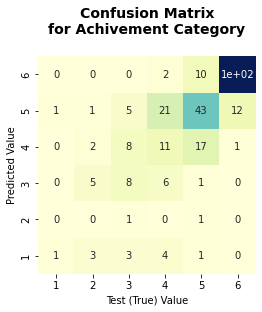

In [55]:
rf_cf = metrics.confusion_matrix(y_test, y_pred) # Random Forest Confusion Matrix
sns.heatmap(data=rf_cf,square=True,annot=True,cbar=False,
            xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6],
            cmap="YlGnBu")
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel("Test (True) Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix\nfor Achivement Category\n",fontweight='bold',fontsize=14)
plt.show()

In the DataFrame below, at glance we reported the correct guess against the total guess performed. As expected, the _Correct Guess Presentence_ intend to increase as _Achievement Category_ increases. This is partially due to the fact that, as mentioned, the number of data points increase with the _Achievement Category_. In other words, more the teams that do not make to the playoffs in comparison to the ones that make to the finals and win the title.

In [56]:
temp = pd.DataFrame({'Test':y_test,'Pred':y_pred})
corr_guess = []
tot_guess = []
for i in range(1,7,1):
    corr_guess.append(temp[(temp['Test'] == i) & (temp['Pred'] == i)].shape[0])
    tot_guess.append(temp[temp['Test'] == i].shape[0])
result = pd.DataFrame({'Achivement Category':range(1,7,1),'Correct Guesses':corr_guess,'Total Guesses':tot_guess})
result['Correct Guess Percentage (%)'] = round(result['Correct Guesses'] / result['Total Guesses'] *100,1)
result

,Achivement Category,Correct Guesses,Total Guesses,Correct Guess Percentage (%)
0,1,1,12,8.3
1,2,0,2,0.0
2,3,8,20,40.0
3,4,11,39,28.2
4,5,43,83,51.8
5,6,104,116,89.7


### 3.3. Model Performance
Using _Metrics_ from _Sklearn_, we can calculated in one line of code _Precision_, _Recall_, _F-score_ and _Support_ for each _Achievement Category_ as summarized in the following table. For reference, we have:

- $ F1_{Score} = 2 \cdot \frac{(Precision  \cdot  Recall)}{(Precision  +  Recall)}\ $


- $ Precision = \frac{TP}{TP+FP} $


- $ Recall  =\frac{TP}{TP+FN} $


where ___TP___ = _True Positive_, ___FP___ = _False Positive_, ___FN___ = _False Negative_, ___Support___ is the number of samples of the true response that lie in that class.

In [57]:
performance = pd.DataFrame(metrics.precision_recall_fscore_support(y_test, y_pred, beta=1.0, average=None))
performance.index = ['Precision','Recall','F1-Score','Support'] # Rename indexes
performance.columns = performance.columns+1 # Rename columns to be consistent with "Archievement Categories"
performance

,1,2,3,4,5,6
Precision,0.500000,0.0,0.320000,0.250000,0.589041,0.888889
Recall,0.083333,0.0,0.400000,0.282051,0.518072,0.896552
F1-Score,0.142857,0.0,0.355556,0.265060,0.551282,0.892704
Support,12.000000,2.0,20.000000,39.000000,83.000000,116.000000


### 3.4. Model Feature Importance
As a final consideration, it is important to understand the different weight that the features have on the classification. Below the importance of features are sorted. The obvious result is that the _Winning Percentage (W%)_ has more weight in the prediction. It is interesting to note that the _Yearly Relative Population_ is roughly as good as _Yearly Relative Payroll_ as a predictor. A less obvious finding is that the _Regular Season Placement_ is the worst predictor in terms of importance. This can be mainly due to, as mentioned earlier, how the league is structure i.e. based on grouping (West-West) and sub-grouping (divisions) of teams.

In [58]:
importance = rf_cl.feature_importances_
importance
df_importance = pd.DataFrame({'Relative Importance':importance})
df_importance.index = ['Yearly Relative Payroll','Yearly Relative Population','Reg. Season Placement','W%']
df_importance
df_importance.sort_values(by='Relative Importance',ascending=False)

,Relative Importance
W%,0.479103
Yearly Relative Payroll,0.195601
Yearly Relative Population,0.175064
Reg. Season Placement,0.150231


## 4. Prediction
### 4.1. NBA 2021-2022 Season Prediction
Using the procedure introduced above, at this point we can try to forecast the 2022 NBA Champions. With this aim, we will take the entire dataset, and we will input the _Features_ of the current seasons to see if we can predict the playoffs outcomes.

In [59]:
# Create Classifier
rf_cl_2022 = RandomForestClassifier(n_estimators=10)
# Train model using the entire set sets
XX = rd[['Yearly Relative Payroll','Yearly Relative Population','Reg. Season Placement','W%']] # Features (all dataset)
yy = rd['Achievement Category'] # Targes (all dataset)
rf_cl_2022.fit(XX,yy)

RandomForestClassifier(n_estimators=10)

In the following, the data for the 2021-2022 season is shown. At the moment this code is being written, the NBA playoffs just started. For fore reference, the following link can be used to check the most updated status: https://www.basketball-reference.com/leagues/NBA_2022.html

In [60]:
data_2022 = pd.read_csv('2022Data.csv')
data_2022.head()

,NBA Team,Population,Payroll,Yearly Relative Payroll,Yearly Relative Population,Reg. Season Placement,W,L,W%
0,Atlanta Hawks,5803000,135166020,0.983421,0.125245,2,43,39,0.524390
1,Boston Celtics,4309000,138096726,1.004744,-0.164453,1,51,31,0.621951
2,Brooklyn Nets,18804000,174811922,1.271871,2.646235,4,44,38,0.536585
3,Charlotte Hornets,2054000,122139566,0.888645,-0.601714,3,43,39,0.524390
4,Chicago Bulls,8865000,136083814,0.990099,0.718989,2,46,36,0.560976


Using the 2021-2022 stats (reference year 2022), we can use the Random Forest Classifier to forecast the outcomt of the palyoffs. The predictions are then saved in the same DataFrame. 

In [61]:
# The model will predict the Achievement Category
xx_2022 = data_2022[['Yearly Relative Payroll','Yearly Relative Population','Reg. Season Placement','W%']]
# Column is added to the original DataFrame
data_2022['Predicted Achievement Category'] = rf_cl_2022.predict(xx_2022)
data_2022.index = data_2022['NBA Team']
data_2022.drop(columns='NBA Team',axis=1,inplace=True)
data_2022

,Population,Payroll,Yearly Relative Payroll,Yearly Relative Population,Reg. Season Placement,W,L,W%,Predicted Achievement Category
NBA Team,,,,,,,,,
Atlanta Hawks,5803000,135166020,0.983421,0.125245,2,43,39,0.524390,5
Boston Celtics,4309000,138096726,1.004744,-0.164453,1,51,31,0.621951,4
Brooklyn Nets,18804000,174811922,1.271871,2.646235,4,44,38,0.536585,2
Charlotte Hornets,2054000,122139566,0.888645,-0.601714,3,43,39,0.524390,5
Chicago Bulls,8865000,136083814,0.990099,0.718989,2,46,36,0.560976,4
Cleveland Cavaliers,1763000,136385911,0.992297,-0.658141,3,44,38,0.536585,5
Dallas Mavericks,6301000,126696965,0.921803,0.221811,2,52,30,0.634146,3
Denver Nuggets,2827000,137963926,1.003778,-0.451824,2,48,34,0.585366,5
Detroit Pistons,3548000,131120355,0.953986,-0.312016,5,23,59,0.280488,6


It can be already seen that the forecasts are not accurate. Below, the possible finalists suggested by the analysis are reported.

In [62]:
data_2022[data_2022.iloc[:,-1] <= 2]

,Population,Payroll,Yearly Relative Payroll,Yearly Relative Population,Reg. Season Placement,W,L,W%,Predicted Achievement Category
NBA Team,,,,,,,,,
Brooklyn Nets,18804000,174811922,1.271871,2.646235,4,44,38,0.536585,2
Miami Heat,6122000,140840240,1.024705,0.187101,1,53,29,0.646341,2
Milwaukee Bucks,1439000,160875421,1.170474,-0.720967,1,51,31,0.621951,2
Utah Jazz,1169000,149760719,1.089607,-0.773322,1,49,33,0.597561,2


### 4.2. Forecast of Playoffs Series
In the previous section we immediately  noticed that the performed analysis is not accurate in predicting the placement outcomes. Despite this results, we still want to try to predict the results of playoff series simply comparing the _Predicted Achievement Category_ and, using this parameter, which team is more likely to win the series.

In [63]:
playoffs = pd.read_csv('2022Playoffs.csv')
playoffs

,Conference,Stage,Away Team,Home Team,Winning Team,Results
0,Eastern,First Round,Boston Celtics,Brooklyn Nets,Boston Celtics,(4-0)
1,Eastern,First Round,Miami Heat,Atlanta Hawks,Miami Heat,(4-1)
2,Eastern,First Round,Milwaukee Bucks,Chicago Bulls,Milwaukee Bucks,(4-1)
3,Eastern,First Round,Philadelphia 76ers,Toronto Raptors,Philadelphia 76ers,(4-2)
4,Western,First Round,Dallas Mavericks,Utah Jazz,Dallas Mavericks,(4-2)
5,Western,First Round,Golden State Warriors,Denver Nuggets,Golden State Warriors,(4-1)
6,Western,First Round,Memphis Grizzlies,Minnesota Timberwolves,Memphis Grizzlies,(4-2)
7,Western,First Round,Phoenix Suns,New Orleans Pelicans,Phoenix Suns,(4-2)
8,Eastern,Semifinals,Boston Celtics,Milwaukee Bucks,Boston Celtics,(4-3)
9,Eastern,Semifinals,Miami Heat,Philadelphia 76ers,Miami Heat,(4-2)


In [64]:
# Create a column where Predicted Achievement Category (PAC) for Away Team is defined from the analysis
playoffs =playoffs.merge(data_2022[['Predicted Achievement Category']],how='left',left_on='Away Team',right_index=True)
playoffs.rename(columns={"Predicted Achievement Category":"PAC Away"},inplace=True)
# Create a column where Predicted Achievement Category (PAC) for Home Team is defined from the analysis
playoffs =playoffs.merge(data_2022[['Predicted Achievement Category']],how='left',left_on='Home Team',right_index=True)
playoffs.rename(columns={"Predicted Achievement Category":"PAC Home"},inplace=True)
playoffs

,Conference,Stage,Away Team,Home Team,Winning Team,Results,PAC Away,PAC Home
0,Eastern,First Round,Boston Celtics,Brooklyn Nets,Boston Celtics,(4-0),4,2
1,Eastern,First Round,Miami Heat,Atlanta Hawks,Miami Heat,(4-1),2,5
2,Eastern,First Round,Milwaukee Bucks,Chicago Bulls,Milwaukee Bucks,(4-1),2,4
3,Eastern,First Round,Philadelphia 76ers,Toronto Raptors,Philadelphia 76ers,(4-2),5,4
4,Western,First Round,Dallas Mavericks,Utah Jazz,Dallas Mavericks,(4-2),3,2
5,Western,First Round,Golden State Warriors,Denver Nuggets,Golden State Warriors,(4-1),3,5
6,Western,First Round,Memphis Grizzlies,Minnesota Timberwolves,Memphis Grizzlies,(4-2),3,5
7,Western,First Round,Phoenix Suns,New Orleans Pelicans,Phoenix Suns,(4-2),4,6
8,Eastern,Semifinals,Boston Celtics,Milwaukee Bucks,Boston Celtics,(4-3),4,2
9,Eastern,Semifinals,Miami Heat,Philadelphia 76ers,Miami Heat,(4-2),2,5


In [65]:
# Compare PAC Home and PAC Way, and predict the winner that has lower PAC
# In case of same value, home team is selected as a winner
cond_mask = playoffs['PAC Away'] < playoffs['PAC Home']
playoffs.loc[playoffs[cond_mask].index,'Predicted Winner'] = playoffs.loc[playoffs[cond_mask].index,'Away Team']
cond_mask = playoffs['PAC Away'] >= playoffs['PAC Home']
playoffs.loc[playoffs[cond_mask].index,'Predicted Winner'] = playoffs.loc[playoffs[cond_mask].index,'Home Team']
# Create a column with the correnctness of the prediction
playoffs["Correct Prediction"] = playoffs['Winning Team'] == playoffs['Predicted Winner']
playoffs

,Conference,Stage,Away Team,Home Team,Winning Team,Results,PAC Away,PAC Home,Predicted Winner,Correct Prediction
0,Eastern,First Round,Boston Celtics,Brooklyn Nets,Boston Celtics,(4-0),4,2,Brooklyn Nets,False
1,Eastern,First Round,Miami Heat,Atlanta Hawks,Miami Heat,(4-1),2,5,Miami Heat,True
2,Eastern,First Round,Milwaukee Bucks,Chicago Bulls,Milwaukee Bucks,(4-1),2,4,Milwaukee Bucks,True
3,Eastern,First Round,Philadelphia 76ers,Toronto Raptors,Philadelphia 76ers,(4-2),5,4,Toronto Raptors,False
4,Western,First Round,Dallas Mavericks,Utah Jazz,Dallas Mavericks,(4-2),3,2,Utah Jazz,False
5,Western,First Round,Golden State Warriors,Denver Nuggets,Golden State Warriors,(4-1),3,5,Golden State Warriors,True
6,Western,First Round,Memphis Grizzlies,Minnesota Timberwolves,Memphis Grizzlies,(4-2),3,5,Memphis Grizzlies,True
7,Western,First Round,Phoenix Suns,New Orleans Pelicans,Phoenix Suns,(4-2),4,6,Phoenix Suns,True
8,Eastern,Semifinals,Boston Celtics,Milwaukee Bucks,Boston Celtics,(4-3),4,2,Milwaukee Bucks,False
9,Eastern,Semifinals,Miami Heat,Philadelphia 76ers,Miami Heat,(4-2),2,5,Miami Heat,True


In [66]:
print('Correct Guesses',
      100 * playoffs['Correct Prediction'].value_counts()[1] / playoffs['Correct Prediction'].value_counts().sum(),
      '%')

Correct Guesses 46.666666666666664 %
